In [2]:
import re
import os
from langchain_community.document_loaders import WebBaseLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain.document_loaders import (
    UnstructuredPDFLoader,
    PyPDFLoader,
    PDFPlumberLoader,
)

USER_AGENT environment variable not set, consider setting it to identify your requests.


In [3]:
def load_pdfs_from_directory(directory_path):
    documents = []
    for filename in os.listdir(directory_path):
        if filename.endswith(".pdf"):
            filepath = os.path.join(directory_path, filename)
            try:
                # Try structured first
                loader = PyPDFLoader(filepath)
                # loader = PDFPlumberLoader(filepath)
                docs = loader.load()
            except:
                # Fallback to unstructured
                loader = UnstructuredPDFLoader(filepath, strategy="ocr-only")
                docs = loader.load()
            documents.extend(docs)
    return documents


def load_documents_from_urls(urls):
    documents = []
    for url in urls:
        loader = WebBaseLoader(url)
        docs = loader.load()
        documents.extend(docs)
    return documents


def clean_text(text):
    # Remove excess newlines and whitespace
    cleaned = re.sub(r"\n{2,}", "\n", text)
    cleaned = re.sub(r"\s{2,}", " ", cleaned)
    return cleaned.strip()


def combine_documents(pdf_docs, web_docs):
    return pdf_docs + web_docs

In [4]:
pdf_path = "./data"

pdf_docs = load_pdfs_from_directory(pdf_path)
len(pdf_docs)

227

In [5]:
def is_valid_doc(doc):
    return doc.page_content and doc.page_content.strip().replace("\n", "").strip() != ""


filtered_docs = [doc for doc in pdf_docs if is_valid_doc(doc)]
len(filtered_docs)

for doc in filtered_docs:
    doc.page_content = clean_text(doc.page_content)


In [6]:
def is_valid_doc(doc):
    text = doc.page_content.strip().replace("\n", "")
    return len(text) > 30


filtd = [doc for doc in filtered_docs if is_valid_doc(doc)]
len(filtd)

216

In [7]:
len(filtered_docs)


218

In [8]:
# # Let's index a few of Lilian Weng's blog posts
# urls = [
#     "https://medium.com/@olalekantemidayo1/5-legal-documents-every-startup-founder-needs-before-collecting-a-kobo-9f09721a59da",
#     "https://www.linkedin.com/pulse/startup-101-legal-foundation-every-needs-temidayo-v-olalekan-2zohf",
#     "https://blog.taxpal.africa/tax-documents-checklist-for-nigerian-businesses-and-individuals/",
#     "https://taxsummaries.pwc.com/nigeria/individual/tax-administration",
#     "https://firmusnigeria.com/doing-business-in-nigeria-questions-investors-ask/",
#     "https://beebot.io/cac-registration-requirements-what-you-need-to-know/?utm_source=chatgpt.com",
#     "https://www.verazadvocates.com.ng/2024/06/19/cac-business-name-registration-2024/?utm_source=chatgpt.com",
#     "https://www.goidara.com/blog/what-happens-after-business-name-registration-in-nigeria?utm_source=chatgpt.com",
# ]

# # Load documents from each URL
# # docs = [WebBaseLoader(url).load() for url in urls]

# web_docs = load_documents_from_urls(urls)
# len(web_docs)

In [ ]:
# full_doc = combine_documents(filtered_docs, web_docs)
# full_doc = combine_documents(filtd, web_docs)
full_doc = filtered_docs  # + web_docs
len(full_doc)

218

In [10]:
full_doc[-1]

Document(metadata={'producer': 'Skia/PDF m141 Google Docs Renderer', 'creator': 'PyPDF', 'creationdate': '', 'title': 'vit_urls', 'source': './data\\vit_urls.pdf', 'total_pages': 30, 'page': 29, 'page_label': '30'}, page_content='4. After the upload click on the submit button. You will only go to the site to check if your certificate is out. Once you see your Business Number you will know that the certificate is ready. Go to the CAC office to collect your certificate. 5. If you are not in any of the states mentioned above, after the name search, go back to CAC office buy the registration forms after filling the forms attach your passport proceed to the bank to make payment, after the payment you submit the forms and the payment teller or receipt, the notice of approval, means of identification to CAC office (NB: you will have to generate Remita Retrieval Reference (RRR) code which shall be used for the payment). 6. Once the form is submitted, you go to CAC office one week after to chec

In [ ]:
# Initialize text splitter
# text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
#     chunk_size=2000, chunk_overlap=50
# )
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=1200, chunk_overlap=150
)
# Split documents into chunks
doc_splits = text_splitter.split_documents(full_doc)

len(doc_splits)

218

### Create embeddings


In [14]:
doc_splits[1]

Document(metadata={'producer': 'Canva', 'creator': 'Canva', 'creationdate': '2024-08-27T11:46:44+00:00', 'title': '2024 BFA-Half Year Compliance Report v1.pdf', 'moddate': '2024-08-27T11:46:31+00:00', 'keywords': 'DAGNR16cYIk,BAFadKxJcSo', 'author': 'King Espy', 'source': './data\\02-compliance_act_report.pdf', 'total_pages': 43, 'page': 1, 'page_label': '2'}, page_content='PEBEC Priority MDAs\nIntroduction\nEfficiency Compliance Ranking\nTransparency Assessment Ranking\nOverall Performance Results\nSector-Specific Scorecard\nReportGov.Ng Compliance Report\nCommendations\nConclusion\nPage 03\nPage 04\nPage 05\nPage 07\nPage 09\nPage 11\nPage 13\nPage 16\nPage 18\nAppendicesPage 19\nTABLE OF')

In [28]:
docs = []
for i, cont in enumerate(doc_splits):
    cont_dict = cont.dict()
    cont_dict["id"] = i
    docs.append(cont_dict)
docs[0]

C:\Users\USER\AppData\Local\Temp\ipykernel_6808\3751171501.py:3: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  cont_dict = cont.dict()


{'id': 0,
 'metadata': {'producer': 'Canva',
  'creator': 'Canva',
  'creationdate': '2024-08-27T11:46:44+00:00',
  'title': '2024 BFA-Half Year Compliance Report v1.pdf',
  'moddate': '2024-08-27T11:46:31+00:00',
  'keywords': 'DAGNR16cYIk,BAFadKxJcSo',
  'author': 'King Espy',
  'source': './data\\02-compliance_act_report.pdf',
  'total_pages': 43,
  'page': 0,
  'page_label': '1'},
 'page_content': 'J a n u a r y 2 0 2 4 – J u n e 2 0 2 4 2024\nHALF YEAR TRANSPARENCY\nAND EFFICIENCY\nCOMPLIANCE REPORT\nPEBECPRESIDENTIAL ENABLING BUSINESS ENVIRONMENT COUNCIL SECRETARIAT',
 'type': 'Document'}

In [29]:
docs = []
for i, cont in enumerate(doc_splits):
    cont_dict = cont.dict()
    cont_dict["id"] = i
    docs.append(cont_dict)
docs[0]

C:\Users\USER\AppData\Local\Temp\ipykernel_6808\3751171501.py:3: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  cont_dict = cont.dict()


{'id': 0,
 'metadata': {'producer': 'Canva',
  'creator': 'Canva',
  'creationdate': '2024-08-27T11:46:44+00:00',
  'title': '2024 BFA-Half Year Compliance Report v1.pdf',
  'moddate': '2024-08-27T11:46:31+00:00',
  'keywords': 'DAGNR16cYIk,BAFadKxJcSo',
  'author': 'King Espy',
  'source': './data\\02-compliance_act_report.pdf',
  'total_pages': 43,
  'page': 0,
  'page_label': '1'},
 'page_content': 'J a n u a r y 2 0 2 4 – J u n e 2 0 2 4 2024\nHALF YEAR TRANSPARENCY\nAND EFFICIENCY\nCOMPLIANCE REPORT\nPEBECPRESIDENTIAL ENABLING BUSINESS ENVIRONMENT COUNCIL SECRETARIAT',
 'type': 'Document'}

In [30]:
docs[0].keys()

dict_keys(['id', 'metadata', 'page_content', 'type'])

In [31]:
docs[0]["metadata"]

{'producer': 'Canva',
 'creator': 'Canva',
 'creationdate': '2024-08-27T11:46:44+00:00',
 'title': '2024 BFA-Half Year Compliance Report v1.pdf',
 'moddate': '2024-08-27T11:46:31+00:00',
 'keywords': 'DAGNR16cYIk,BAFadKxJcSo',
 'author': 'King Espy',
 'source': './data\\02-compliance_act_report.pdf',
 'total_pages': 43,
 'page': 0,
 'page_label': '1'}

### Set up embedding model and vectorstore


In [19]:
from qdrant_client import QdrantClient
from qdrant_client import models

In [20]:
client = QdrantClient("http://localhost:6333")

In [21]:
model_handle = "jinaai/jina-embeddings-v2-small-en"
EMBEDDING_DIMENSIONALITY = 512
collection_name = "agentic-rag"

In [22]:
# docker run -p 6333:6333 qdrant/qdrant

In [23]:
# client.delete_collection(collection_name=collection_name)

True

In [24]:
# Create the collection with specified vector parameters
# if client.get_collection(collection_name=collection_name):
#     print(f"collection '{collection_name}' already exists")
# else:
client.create_collection(
    collection_name=collection_name,
    vectors_config=models.VectorParams(
        size=EMBEDDING_DIMENSIONALITY,  # Dimensionality of the vectors
        distance=models.Distance.COSINE,  # Distance metric for similarity search
    ),
)

True

In [33]:
docs[0]

{'id': 0,
 'metadata': {'producer': 'Canva',
  'creator': 'Canva',
  'creationdate': '2024-08-27T11:46:44+00:00',
  'title': '2024 BFA-Half Year Compliance Report v1.pdf',
  'moddate': '2024-08-27T11:46:31+00:00',
  'keywords': 'DAGNR16cYIk,BAFadKxJcSo',
  'author': 'King Espy',
  'source': './data\\02-compliance_act_report.pdf',
  'total_pages': 43,
  'page': 0,
  'page_label': '1'},
 'page_content': 'J a n u a r y 2 0 2 4 – J u n e 2 0 2 4 2024\nHALF YEAR TRANSPARENCY\nAND EFFICIENCY\nCOMPLIANCE REPORT\nPEBECPRESIDENTIAL ENABLING BUSINESS ENVIRONMENT COUNCIL SECRETARIAT',
 'type': 'Document'}

In [ ]:
points = []
id = 0
for i, doc in enumerate(docs):
    # Create a PointStruct with the document's embedding
    point = models.PointStruct(
        id=i,  # Unique ID for the point
        vector=models.Document(
            text=doc["page_content"],
            model=model_handle,
        ),
        payload={"metadata": doc["metadata"]},  # Optional metadata (like the raw text)
    )
    points.append(point)
    id += 1

In [27]:
len(points), len(docs)

(218, 218)

In [28]:
client.upsert(collection_name=collection_name, points=points)

UpdateResult(operation_id=0, status=<UpdateStatus.COMPLETED: 'completed'>)

In [29]:
def search(query, limit=3):
    results = client.query_points(
        collection_name=collection_name,
        query=models.Document(  # embed the query text locally with "jinaai/jina-embeddings-v2-small-en"
            text=query, model=model_handle
        ),
        limit=limit,  # top closest matches
        with_payload=True,  # to get metadata in the results
    )

    return results

In [30]:
q = "Starting a business in Nigeria"
r = search(q)

In [ ]:
r.points  # [0].payload

[ScoredPoint(id=190, version=0, score=0.9271824, payload={'metadata': {'producer': 'Skia/PDF m141 Google Docs Renderer', 'creator': 'PyPDF', 'creationdate': '', 'title': 'vit_urls', 'source': './data\\vit_urls.pdf', 'total_pages': 30, 'page': 2, 'page_label': '3'}}, vector=None, shard_key=None, order_value=None),
 ScoredPoint(id=189, version=0, score=0.89648193, payload={'metadata': {'producer': 'Skia/PDF m141 Google Docs Renderer', 'creator': 'PyPDF', 'creationdate': '', 'title': 'vit_urls', 'source': './data\\vit_urls.pdf', 'total_pages': 30, 'page': 1, 'page_label': '2'}}, vector=None, shard_key=None, order_value=None),
 ScoredPoint(id=191, version=0, score=0.8935541, payload={'metadata': {'producer': 'Skia/PDF m141 Google Docs Renderer', 'creator': 'PyPDF', 'creationdate': '', 'title': 'vit_urls', 'source': './data\\vit_urls.pdf', 'total_pages': 30, 'page': 3, 'page_label': '4'}}, vector=None, shard_key=None, order_value=None)]

### With Langchain


In [ ]:
import os
from dotenv import load_dotenv

load_dotenv()

True

In [40]:
# from qdrant_client import QdrantClient

# qdrant_client = QdrantClient(
#     url=os.environ["QDRANT_URL"],
#     api_key=os.environ["QDRANT_API"],
# )

# print(qdrant_client.get_collections())

In [39]:
from langchain_community.vectorstores import Qdrant
from langchain_community.embeddings import FastEmbedEmbeddings
from langchain_qdrant import QdrantVectorStore
# from langchain_openai import OpenAIEmbeddings


In [ ]:
embedding_model = FastEmbedEmbeddings(model_name="jinaai/jina-embeddings-v2-small-en")

In [ ]:
collection_name = "vit-rag"

doc_store = QdrantVectorStore.from_documents(
    documents=doc_splits,
    embeddings=embedding_model,
    url=os.environ["QDRANT_URL"],
    api_key=os.environ["QDRANT_API"],
    collection_name=collection_name,
)


# this is for local disk storage

# vectorstore = Qdrant.from_documents(
#     documents=doc_splits,  # Your list of Document objects
#     embedding=embedding_model,  # Your embedding function
#     client=qdrant_client,
#     collection_name=collection_name,
# )


In [44]:
doc_store.collection_name


'vit-rag'

In [53]:
query = "How to register a company in Nigeria?"
found_docs = doc_store.similarity_search(query, k=4)


In [54]:
for cont in found_docs:
    print(f"\n{cont.page_content}")


Upload Minutes of meetings or resolutions appointing the trustees including lists of members and the voting patterns or you can request a sample 29. What are the requirements for registering a company limited by shares in Nigeria? Two proposed names of the company for reservation and approval Indicate if you have applied or reserved your business name, if, yes provide the availability code General nature of the Business of the company Detailed address of the registered office Detailed address of the head office if different from the registered office Detailed address of branch office if any Telephone number, postal code & Email address of the company. Name, address, phone number, nationality, occupation, gender, and email address of the witnesses Upload passport photograph, Valid ID, and signature of the witness Name, email address, gender, date of birth, service, tax residency, Nationality, occupation, and residential addresses of the shareholders Upload passport photograph, Valid ID

In [56]:
# Create retriever from vector store
retriever = doc_store.as_retriever()
retriever

VectorStoreRetriever(tags=['QdrantVectorStore', 'FastEmbedEmbeddings'], vectorstore=<langchain_qdrant.qdrant.QdrantVectorStore object at 0x0000025DDDC4A510>, search_kwargs={})

In [60]:
r = retriever.invoke("type of businesses in Nigeria?")
r

[Document(metadata={'producer': 'Skia/PDF m141 Google Docs Renderer', 'creator': 'PyPDF', 'creationdate': '', 'title': 'vit_urls', 'source': './data\\vit_urls.pdf', 'total_pages': 30, 'page': 2, 'page_label': '3', '_id': '2b5f4e5b-492d-470c-8def-00d1a4f92d8e', '_collection_name': 'vit-rag'}, page_content='4. What are the profitable businesses to start in Nigeria? Nigeria has a demand for various goods and services, due to its population size. Nigeria is a business-friendly economy, what you need to do is start a business in an area, work hard towards and make it profitable. 5. What is the best business to start in Nigeria? Businesses in tech space, farming, agribusiness, food and cosmetics, fashion, manufacturing, services, and a host of others BUSINESS REGISTRATION Business registration is a process that usually takes a few days, but before you start the registration process, you will want to make sure you have all the necessary information. Here are a number of questions you may find

### retrieval tool --> concatenates doucuments


In [65]:
from langchain.tools.retriever import create_retriever_tool
# from utils import format_retriever_results

In [ ]:
# Create retriever tool
retriever_tool = create_retriever_tool(
    retriever,
    "retrieve_context",
    "Search and return information about businesses in Nigeria.",
)

# Test the retriever tool
result = retriever_tool.invoke(
    {"query": "what do i need to register a business in Nigeria?"}
)
print(result[10:1000])

eed a business permit as a foreigner to work and carry out business in Nigeria? Yes, a foreigner needs a business permit 11. What are the various types of businesses I can register in Nigeria? The various types or forms of businesses in Nigeria are – Business name, limited liability, partnerships, and incorporated trustees 12. How long does it take to register a business in Nigeria? It takes an average of between 1-3 weeks to register a business in Nigeria 13. What is the benefit of registering a business in Nigeria? Registering your business in Nigeria creates a legal personality that will help you get access to government grants & investors 14. How many directors is a company required to have in Nigeria? A private company is required to have a minimum of one director, however, a company limited by guarantee is required to have a minimum of two directors 15. Can a partnership be registered? Yes. 16. How do I decide the type or form of business I should register in Nigeria? Y


#### Leveraging LLM


In [ ]:
import os
from langchain.chat_models import init_chat_model

load_dotenv()

llm = init_chat_model(
    "gemini-2.5-flash",
    model_provider="google_genai",
)


In [ ]:
# Bind tools
tools = [retriever_tool]
tools_by_name = {tool.name: tool for tool in tools}

# Bind tools to LLM for agent functionality
llm_with_tools = llm.bind_tools(tools)

In [80]:
res = llm_with_tools.invoke("Hello, what can you help me with?")
print(res)

content='I can help you find information about businesses in Nigeria. What kind of businesses are you looking for? ' additional_kwargs={} response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': []} id='run--44e850fd-a000-427e-ac32-e0c205e33a0c-0' usage_metadata={'input_tokens': 56, 'output_tokens': 20, 'total_tokens': 76, 'input_token_details': {'cache_read': 0}}


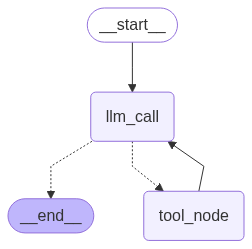

In [ ]:
from typing_extensions import Literal
from IPython.display import Image, display
from langchain_core.messages import SystemMessage, ToolMessage
from langgraph.graph import END, START, StateGraph, MessagesState

# Define the RAG agent system prompt
rag_prompt = """You are a helpful assistant tasked with retrieving information from a context on starting a business in Nigeria. 
Clarify the scope of research with the user before using your retrieval tool to gather context. Reflect on any context you fetch, and
proceed until you have sufficient context to answer the user's research request."""


def llm_call(state: MessagesState) -> dict:
    """LLM decides whether to call a tool or not.

    Args:
        state: Current conversation state

    Returns:
        Dictionary with new messages
    """
    return {
        "messages": [
            llm_with_tools.invoke(
                [SystemMessage(content=rag_prompt)] + state["messages"]
            )
        ]
    }


def tool_node(state: MessagesState) -> dict:
    """Performs the tool call.

    Args:
        state: Current conversation state with tool calls

    Returns:
        Dictionary with tool results
    """
    result = []
    for tool_call in state["messages"][-1].tool_calls:
        tool = tools_by_name[tool_call["name"]]
        observation = tool.invoke(tool_call["args"])
        result.append(ToolMessage(content=observation, tool_call_id=tool_call["id"]))
    return {"messages": result}


def should_continue(state: MessagesState) -> Literal["tool_node", "__end__"]:
    """Decide if we should continue the loop or stop based upon whether the LLM made a tool call.

    Args:
        state: Current conversation state

    Returns:
        Next node to execute
    """
    messages = state["messages"]
    last_message = messages[-1]

    # If the LLM makes a tool call, then perform an action
    if last_message.tool_calls:
        return "tool_node"
    # Otherwise, we stop (reply to the user)
    return END


# Build workflow
agent_builder = StateGraph(MessagesState)

# Add nodes
agent_builder.add_node("llm_call", llm_call)
agent_builder.add_node("tool_node", tool_node)

# Add edges to connect nodes
agent_builder.add_edge(START, "llm_call")
agent_builder.add_conditional_edges(
    "llm_call",
    should_continue,
    {
        "tool_node": "tool_node",
        END: END,
    },
)
agent_builder.add_edge("tool_node", "llm_call")

# Compile the agent
agent = agent_builder.compile()

# Show the agent
display(Image(agent.get_graph(xray=True).draw_mermaid_png()))

In [ ]:
# from utils import format_messages

# Execute the RAG agent
query = "What are the types of businesses in Nigeria?"
result = agent.invoke({"messages": [{"role": "user", "content": query}]})

result = agent.invoke(state)

# Format and display results
print(result["messages"])

[HumanMessage(content='What are the types of businesses in Nigeria?', additional_kwargs={}, response_metadata={}, id='39195837-3d6f-4ca8-adde-101707447358'), AIMessage(content="To answer your question about the types of businesses in Nigeria, I need to clarify what specific aspect you're interested in. Are you asking about:\n\n*   **Legal structures** (e.g., sole proprietorship, partnership, limited liability company)?\n*   **Industry sectors** (e.g., agriculture, technology, oil and gas)?\n*   **Business sizes** (e.g., small, medium, large enterprises)?\n\nOnce I have a better understanding of your query, I can use my tools to retrieve the most relevant information.", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': []}, id='run--e0d6492b-de6c-4e61-95d9-20b24d8f8b62-0', usage_metadata={'input_tokens': 119, 'output_tokens': 193, 'total_tokens': 312, 'input_

In [ ]:
print(result["messages"][1].content)

To answer your question about the types of businesses in Nigeria, I need to clarify what specific aspect you're interested in. Are you asking about:

*   **Legal structures** (e.g., sole proprietorship, partnership, limited liability company)?
*   **Industry sectors** (e.g., agriculture, technology, oil and gas)?
*   **Business sizes** (e.g., small, medium, large enterprises)?

Once I have a better understanding of your query, I can use my tools to retrieve the most relevant information.


In [100]:
# Save the messages to use for next turn
conversation = result["messages"]

follow_up = "Tell me more about sole proprietorships."

# Append the new user message
conversation.append({"role": "user", "content": follow_up})

# Invoke agent with full message history
result = agent.invoke({"messages": conversation})

# Update the conversation with the new messages
conversation = result["messages"]

In [ ]:
conversation[-1]

AIMessage(content='In Nigeria, a sole proprietorship is referred to as a "business name" or "Enterprise." It\'s the simplest form of business to register and operate. Here\'s what I\'ve gathered about them:\n\n**Key Characteristics:**\n\n*   **Registration Body:** The Corporate Affairs Commission (CAC) is the government body responsible for registering all businesses in Nigeria, including sole proprietorships.\n*   **Online Registration:** The registration process for a business name can now be completed entirely online, and electronic certificates are issued instead of paper ones.\n*   **Legal Personality:** Registering your business, even as a sole proprietorship, creates a legal personality for it. This can be beneficial for accessing government grants and attracting investors.\n*   **Conversion:** A business name can be converted into a company limited by shares, offering flexibility as your business grows.\n\n**Requirements for Registration:**\n\nTo register a business name (sole 

In [ ]:
def get_last_assistant_message(messages: list[str]) -> str:
    for msg in reversed(messages):
        return msg.content
    return "[No assistant response found]"


In [158]:
result["messages"][-1].content

'In Nigeria, a sole proprietorship is referred to as a "business name" or "Enterprise." It\'s the simplest form of business to register and operate. Here\'s what I\'ve gathered about them:\n\n**Key Characteristics:**\n\n*   **Registration Body:** The Corporate Affairs Commission (CAC) is the government body responsible for registering all businesses in Nigeria, including sole proprietorships.\n*   **Online Registration:** The registration process for a business name can now be completed entirely online, and electronic certificates are issued instead of paper ones.\n*   **Legal Personality:** Registering your business, even as a sole proprietorship, creates a legal personality for it. This can be beneficial for accessing government grants and attracting investors.\n*   **Conversion:** A business name can be converted into a company limited by shares, offering flexibility as your business grows.\n\n**Requirements for Registration:**\n\nTo register a business name (sole proprietorship) in

In [ ]:
for msg in reversed(result["messages"]):
    if msg["role"] == "assistant":
        print(msg["content"])
    else:
        print("none")

TypeError: 'AIMessage' object is not subscriptable

In [150]:
response = conversation[-1].content
print("Assistant:", response)


Assistant: In Nigeria, a sole proprietorship is referred to as a "business name" or "Enterprise." It's the simplest form of business to register and operate. Here's what I've gathered about them:

**Key Characteristics:**

*   **Registration Body:** The Corporate Affairs Commission (CAC) is the government body responsible for registering all businesses in Nigeria, including sole proprietorships.
*   **Online Registration:** The registration process for a business name can now be completed entirely online, and electronic certificates are issued instead of paper ones.
*   **Legal Personality:** Registering your business, even as a sole proprietorship, creates a legal personality for it. This can be beneficial for accessing government grants and attracting investors.
*   **Conversion:** A business name can be converted into a company limited by shares, offering flexibility as your business grows.

**Requirements for Registration:**

To register a business name (sole proprietorship) in Nig

{'metadata': {'source': 'https://medium.com/@olalekantemidayo1/5-legal-documents-every-startup-founder-needs-before-collecting-a-kobo-9f09721a59da',
  'title': '5 Legal Documents Every Startup Founder Needs Before Collecting a Kobo | by Temidayo V. Olalekan | Jun, 2025 | Medium',
  'description': 'Do you know that one of the top reasons most Nigerian startups fail during investor or regulator due diligence is the lack of proper paperwork and legal documentation? This can impact your funding…',
  'language': 'en'}}

### Load LLM
